In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
#loading the data using pandas

df = pd.read_csv("C:\\datasets\\classification projects\\onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


**Data exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
categorical = ['Gender','Martial Status','Occupation','Monthly Income','Educational Qualifications','Output','Feedback','Unnamed: 12']
numarical = ['Age','Pincode','Family size']
float_values = ['latitude','longitude']

In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [6]:
df['Age'].min()

18

In [7]:
df['Age'].max()

33

In [8]:
df["Age_category"]= pd.cut(df['Age'],
                           bins=[0,18,23,28,33],
                           labels=['Teen','Young','young_adult','mid_age'])

In [9]:
df[['Age','Age_category']]

,Age,Age_category
0,20,Young
1,24,young_adult
2,22,Young
3,22,Young
4,22,Young
...,...,...
383,23,Young
384,23,Young
385,22,Young
386,23,Young


In [10]:
pd.crosstab(df['Age_category'],df['Unnamed: 12'],margins=True)

Unnamed: 12,No,Yes,All
Age_category,,,
Teen,0,1,1
Young,17,149,166
young_adult,50,123,173
mid_age,20,28,48
All,87,301,388


In [11]:
# age 23-28 : highest orders
# and age 0-18 : lowest orders

In [12]:
df['Unnamed: 12'].value_counts()

Yes    301
No      87
Name: Unnamed: 12, dtype: int64

In [13]:
pd.crosstab(df['Gender'],df['Unnamed: 12'],margins=True)

Unnamed: 12,No,Yes,All
Gender,,,
Female,40,126,166
Male,47,175,222
All,87,301,388


In [14]:
# females - low orders
# males - highest orders

In [15]:
df["Marital Status"].value_counts()

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64

In [16]:
pd.crosstab(df['Marital Status'],df['Unnamed: 12'],margins=True)

Unnamed: 12,No,Yes,All
Marital Status,,,
Married,42,66,108
Prefer not to say,6,6,12
Single,39,229,268
All,87,301,388


In [17]:
# singles - high orders
# prefer not to say - low orders

In [18]:
df['Occupation'].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

In [19]:
pd.crosstab(df['Occupation'],df['Unnamed: 12'],margins=True)

Unnamed: 12,No,Yes,All
Occupation,,,
Employee,42,76,118
House wife,2,7,9
Self Employeed,20,34,54
Student,23,184,207
All,87,301,388


In [20]:
# low orders - House wife
# high orders- student

In [21]:
pd.get_dummies(df['Gender'],drop_first= True,dtype=int)

,Male
0,0
1,0
2,1
3,0
4,1
...,...
383,0
384,0
385,0
386,1


In [22]:

df['Occupation']= df['Occupation'].map({'House wife':0,'Student':1,'Employee':2,'Self Employeed':3})
df['Occupation']

0      1
1      1
2      1
3      1
4      1
      ..
383    1
384    1
385    1
386    1
387    1
Name: Occupation, Length: 388, dtype: int64

In [23]:
categorical

['Gender',
 'Martial Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback',
 'Unnamed: 12']

In [24]:
df['Gender'].value_counts()

Male      222
Female    166
Name: Gender, dtype: int64

In [25]:

df['Gender']= df['Gender'].map({'Female':0,'Male':1})
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Age_category
0,20,0,Single,1,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes,Young
1,24,0,Single,1,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes,young_adult
2,22,1,Single,1,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes,Young
3,22,0,Single,1,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes,Young
4,22,1,Single,1,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes,Young


In [26]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["Marital Status"]=le.fit_transform(df['Marital Status'])
df["Educational Qualifications"]=le.fit_transform(df['Educational Qualifications'])
df["Age_category"]=le.fit_transform(df['Age_category'])
df['Feedback']= le.fit_transform(df['Feedback'])
df['Monthly Income']=le.fit_transform(df['Monthly Income'])
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Age_category
0,20,0,2,1,4,2,4,12.9766,77.5993,560001,Yes,1,Yes,1
1,24,0,2,1,2,0,3,12.9770,77.5773,560009,Yes,1,Yes,3
2,22,1,2,1,2,2,3,12.9551,77.6593,560017,Yes,0,Yes,1
3,22,0,2,1,4,0,6,12.9473,77.5616,560019,Yes,1,Yes,1
4,22,1,2,1,2,2,4,12.9850,77.5533,560010,Yes,1,Yes,1


In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder(categories= [['No','Yes']])
df['Unnnamed']=oe.fit_transform(df[['Unnamed: 12']])

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder(categories= [['No','Yes']])
df['Output']=oe.fit_transform(df[['Output']])

In [29]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Age_category,Unnnamed
0,20,0,2,1,4,2,4,12.9766,77.5993,560001,1.0,1,Yes,1,1.0
1,24,0,2,1,2,0,3,12.9770,77.5773,560009,1.0,1,Yes,3,1.0
2,22,1,2,1,2,2,3,12.9551,77.6593,560017,1.0,0,Yes,1,1.0
3,22,0,2,1,4,0,6,12.9473,77.5616,560019,1.0,1,Yes,1,1.0
4,22,1,2,1,2,2,4,12.9850,77.5533,560010,1.0,1,Yes,1,1.0


In [31]:
df = df.drop(['Age', 'Unnamed: 12'], axis=1)

In [32]:
df.head()

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Age_category,Unnnamed
0,0,2,1,4,2,4,12.9766,77.5993,560001,1.0,1,1,1.0
1,0,2,1,2,0,3,12.9770,77.5773,560009,1.0,1,3,1.0
2,1,2,1,2,2,3,12.9551,77.6593,560017,1.0,0,1,1.0
3,0,2,1,4,0,6,12.9473,77.5616,560019,1.0,1,1,1.0
4,1,2,1,2,2,4,12.9850,77.5533,560010,1.0,1,1,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      388 non-null    int64  
 1   Marital Status              388 non-null    int32  
 2   Occupation                  388 non-null    int64  
 3   Monthly Income              388 non-null    int32  
 4   Educational Qualifications  388 non-null    int32  
 5   Family size                 388 non-null    int64  
 6   latitude                    388 non-null    float64
 7   longitude                   388 non-null    float64
 8   Pin code                    388 non-null    int64  
 9   Output                      388 non-null    float64
 10  Feedback                    388 non-null    int32  
 11  Age_category                388 non-null    int32  
 12  Unnnamed                    388 non-null    float64
dtypes: float64(4), int32(5), int64(4)
m

In [34]:
df.describe()

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Age_category,Unnnamed
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,0.572165,1.412371,1.559278,2.713918,1.069588,3.280928,12.972058,77.600160,560040.113402,0.775773,0.817010,2.012887,0.775773
std,0.495404,0.895035,0.756772,1.491790,1.035695,1.351025,0.044489,0.051354,31.399609,0.417611,0.387157,0.941349,0.417611
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.865200,77.484200,560001.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,12.936900,77.565275,560010.750000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,12.977000,77.592100,560033.500000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,2.000000,4.000000,2.000000,4.000000,12.997025,77.630900,560068.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,2.000000,3.000000,4.000000,4.000000,6.000000,13.102000,77.758200,560109.000000,1.000000,1.000000,3.000000,1.000000


In [35]:
df.keys()

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Age_category', 'Unnnamed'],
      dtype='object')

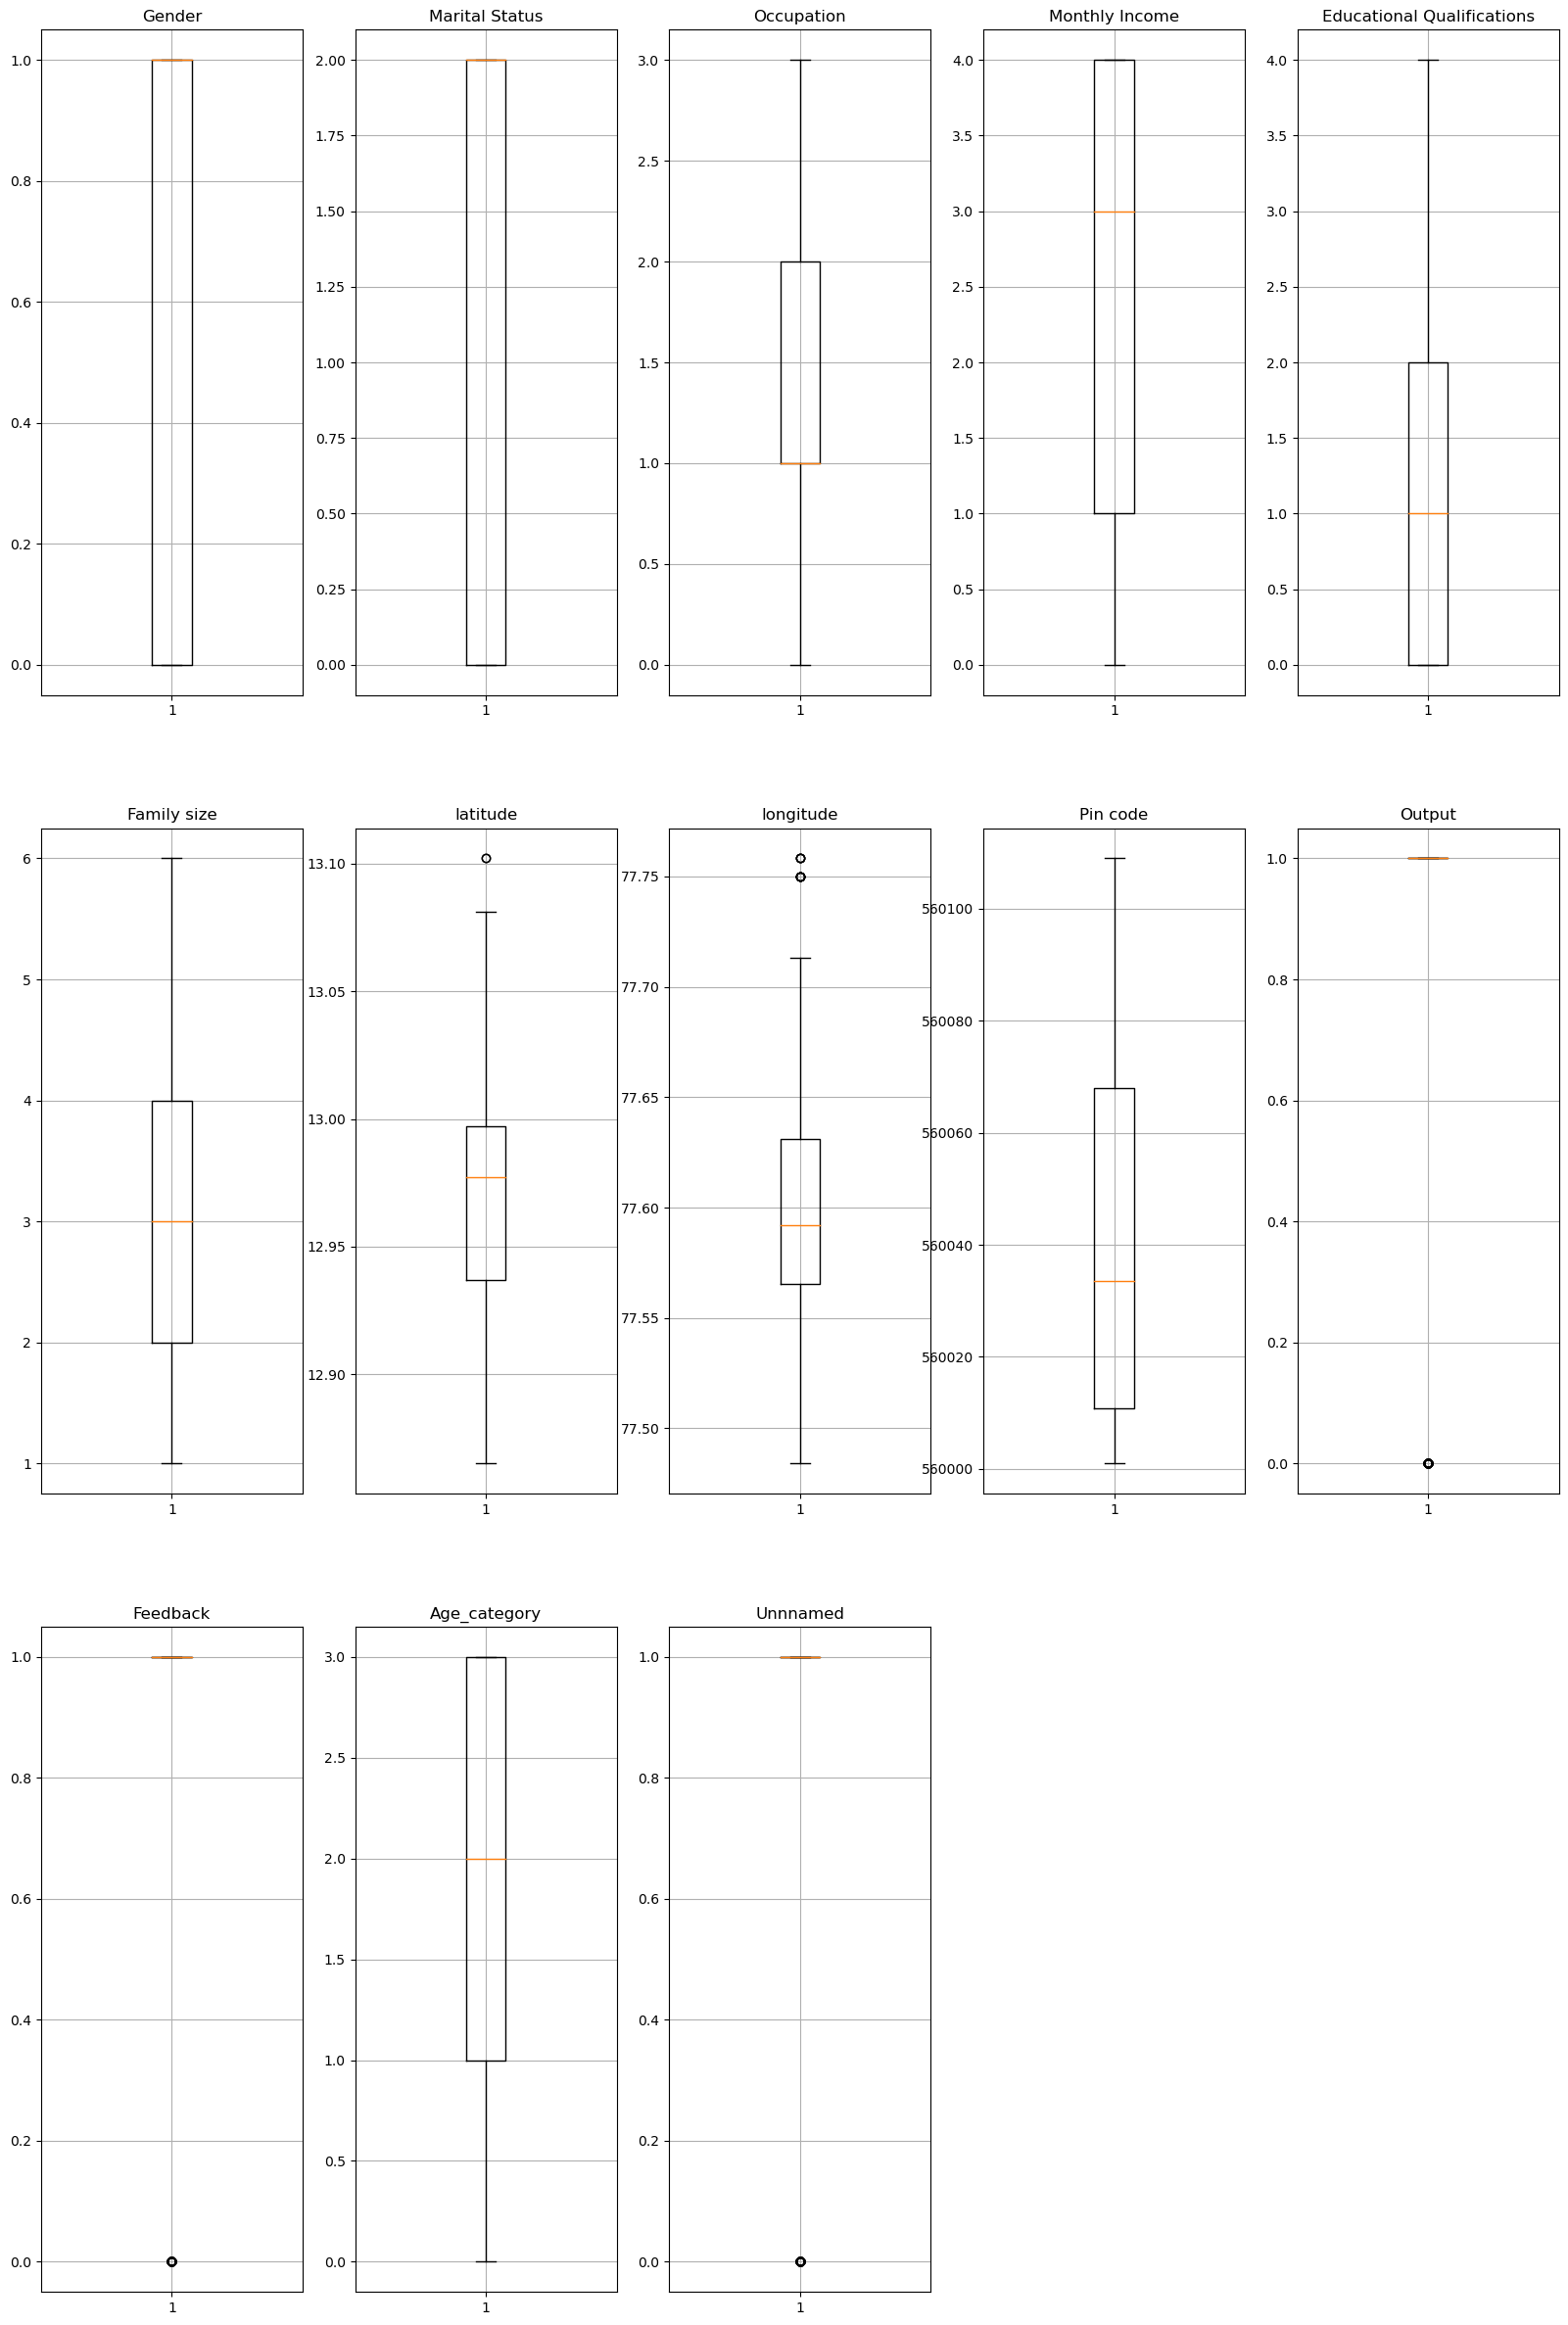

In [38]:
col_dict = {'Gender':1, 'Marital Status':2, 'Occupation':3, 'Monthly Income':4, 'Educational Qualifications':5,
            'Family size':6, 'latitude':7, 'longitude':8, 'Pin code':9, 'Output':10, 'Feedback':11, 'Age_category':12, 'Unnnamed':13}
# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(3,5,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

In [39]:
df.skew()

Gender                       -0.292848
Marital Status               -0.908313
Occupation                    0.606809
Monthly Income               -0.670295
Educational Qualifications    0.140763
Family size                   0.401376
latitude                      0.160258
longitude                     0.801995
Pin code                      0.574913
Output                       -1.327562
Feedback                     -1.646116
Age_category                 -0.044398
Unnnamed                     -1.327562
dtype: float64

In [40]:
df.corr()

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Age_category,Unnnamed
Gender,1.000000,0.031781,0.143637,0.005281,-0.082837,-0.082488,-0.046424,-0.059175,0.035685,0.034701,-0.045486,0.034016,0.034701
Marital Status,0.031781,1.000000,-0.444378,0.297593,0.086039,-0.207170,0.053687,-0.032214,-0.099405,0.268759,0.188500,-0.380484,0.268759
Occupation,0.143637,-0.444378,1.000000,-0.626960,-0.168468,0.030426,-0.037889,0.149539,0.163048,-0.256265,-0.214233,0.472276,-0.256265
Monthly Income,0.005281,0.297593,-0.626960,1.000000,0.145041,0.018184,0.078574,-0.137106,-0.074439,0.211994,0.204408,-0.354338,0.211994
Educational Qualifications,-0.082837,0.086039,-0.168468,0.145041,1.000000,0.011846,0.073258,-0.113820,-0.097340,0.131758,0.115614,0.060036,0.131758
Family size,-0.082488,-0.207170,0.030426,0.018184,0.011846,1.000000,-0.053537,0.070126,-0.009402,-0.043780,-0.010148,-0.008949,-0.043780
latitude,-0.046424,0.053687,-0.037889,0.078574,0.073258,-0.053537,1.000000,-0.144234,-0.201813,-0.159963,-0.128939,-0.022150,-0.159963
longitude,-0.059175,-0.032214,0.149539,-0.137106,-0.113820,0.070126,-0.144234,1.000000,0.156119,0.045265,0.073083,0.080071,0.045265
Pin code,0.035685,-0.099405,0.163048,-0.074439,-0.097340,-0.009402,-0.201813,0.156119,1.000000,-0.019929,-0.003603,-0.009753,-0.019929
Output,0.034701,0.268759,-0.256265,0.211994,0.131758,-0.043780,-0.159963,0.045265,-0.019929,1.000000,0.592609,-0.209541,1.000000


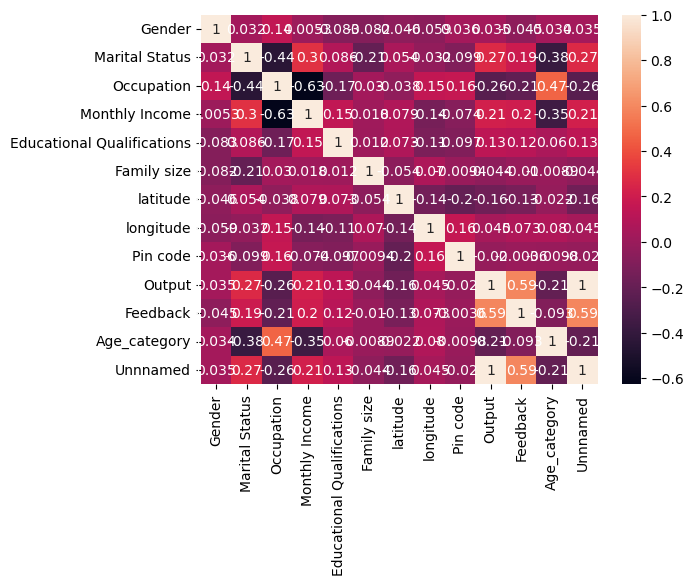

In [43]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [45]:
df.drop('Unnnamed',axis=1)

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Age_category
0,0,2,1,4,2,4,12.9766,77.5993,560001,1.0,1,1
1,0,2,1,2,0,3,12.9770,77.5773,560009,1.0,1,3
2,1,2,1,2,2,3,12.9551,77.6593,560017,1.0,0,1
3,0,2,1,4,0,6,12.9473,77.5616,560019,1.0,1,1
4,1,2,1,2,2,4,12.9850,77.5533,560010,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,2,1,4,2,2,12.9766,77.5993,560001,1.0,1,1
384,0,2,1,4,2,4,12.9854,77.7081,560048,1.0,1,1
385,0,2,1,4,2,5,12.9850,77.5533,560010,1.0,1,1
386,1,2,1,2,2,2,12.9770,77.5773,560009,1.0,1,1


In [46]:
x= df.drop('Output',axis=1)
y=df['Output']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Modelling**

1. LOGISTIC REGRESSION

In [49]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

#prediction

ypred_train = lr.predict(x_train)
ypred_test = lr.predict(x_test)

#evalution

from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(y_train,ypred_train))
print("Test accuracy:",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("CV score:",cross_val_score(lr,x_train,y_train,cv=5).mean())

Train accuracy: 0.7774193548387097
Test accuracy: 0.7692307692307693
CV score: 0.7774193548387096


2.KNN

scaling data

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.transform(x_test)

**Hyperparameter Tuning**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
estimator= KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,10))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

cv_classifier.fit(x_train_scaler,y_train)

cv_classifier.best_params_

{'n_neighbors': 2}

# KNN model with best hyperparameters

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_scaler,y_train)

ypred_train = knn.predict(x_train_scaler)
ypred_test  = knn.predict(x_test_scaler)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Test accuracy:", accuracy_score(y_test,ypred_test))
print("CV score:", cross_val_score(knn,x_train_scaler,y_train,cv=5).mean())

Train accuracy: 0.9935483870967742
Test accuracy: 0.9743589743589743
CV score: 0.9838709677419356


# 3.Decision Tree Modelling
with best Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=0)

#parameters (which you want to tune and identify the best)
param_grid = {'criterion':["gini","entropy"],
             "max_depth":[1,2,3,4,5,6]}

grid=  GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)

grid.fit(x_train_scaler,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

**importance of each feature given by this model**

In [54]:
grid=grid.best_estimator_.feature_importances_

In [55]:
feats= pd.DataFrame(data=grid,index=x.columns,columns=["Feture Importance"])

feats_imp = feats[feats['Feture Importance']>0]

important_feature_list= feats_imp.index.to_list()

# Final Decision Tree Model

with best hyperparameters& with important features

In [56]:
#input with important features
x_imp= x[important_feature_list]

#train_test_split
x_train_imp,x_test_imp,y_train,y_test= train_test_split(x_imp,y,test_size=0.2, random_state=0)

#model with best hyperparameters
final_dt_model= DecisionTreeClassifier(criterion="gini",max_depth=1, random_state=0)
final_dt_model.fit(x_train_imp,y_train)

ypred_train= final_dt_model.predict(x_train_imp)
ypred_test = final_dt_model.predict(x_test_imp)

# evallution

print("Train accuracy:", accuracy_score(y_train,ypred_train))
print("Test accuracy:", accuracy_score(y_test,ypred_test))
print("CV score:",cross_val_score(final_dt_model,x_train_imp,y_train,cv=5).mean())

Train accuracy: 1.0
Test accuracy: 1.0
CV score: 1.0


# Evalution Metrics

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[18,  0],
       [ 0, 60]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        60

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

